<a href="https://colab.research.google.com/github/bibekpaudyal1/Clustering_FLearning_VNetwork_Project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import xml.etree.ElementTree as ET


tree = ET.parse('sumoTrace.xml')
root = tree.getroot()

# Define lists to store data
data = {
    'time': [],
    'id': [],
    'x': [],
    'y': [],
    'angle': [],
    'speed': [],
    'pos': [],
    'lane': [],
    'slope': []
}

# Extract data from XML and populate lists
for timestep in root:
    time = float(timestep.attrib['time'])
    for vehicle in timestep:
        data['time'].append(time)
        data['id'].append(int(vehicle.attrib['id']))
        data['x'].append(float(vehicle.attrib['x']))
        data['y'].append(float(vehicle.attrib['y']))
        data['angle'].append(float(vehicle.attrib['angle']))
        data['speed'].append(float(vehicle.attrib['speed']))
        data['pos'].append(float(vehicle.attrib['pos']))
        data['lane'].append(vehicle.attrib['lane'])
        data['slope'].append(float(vehicle.attrib['slope']))

df = pd.DataFrame.from_dict(data)

all_timesteps = np.arange(df['time'].min(), df['time'].max() + 1)
missing_timesteps = np.setdiff1d(all_timesteps, df['time'])
missing_data = pd.DataFrame({'time': missing_timesteps})
df = pd.concat([df, missing_data]).sort_values('time').reset_index(drop=True)

print(df.head())
print(type(df))
print(df.describe)



   time   id        x        y   angle  speed   pos           lane  slope
0   0.0  0.0  2569.42  1692.44  356.56   0.00  5.10  195397561#5_0    0.0
1   1.0  0.0  2569.34  1693.81  356.56   1.38  6.48  195397561#5_0    0.0
2   1.0  1.0  2452.87   830.62  265.12   0.00  5.10   -4588219#1_0    0.0
3   2.0  0.0  2569.18  1696.51  356.53   2.70  9.18  195397561#5_0    0.0
4   2.0  1.0  2451.29   830.48  265.12   1.58  6.68   -4588219#1_0    0.0
<class 'pandas.core.frame.DataFrame'>
<bound method NDFrame.describe of        time    id        x        y   angle  speed    pos           lane  \
0       0.0   0.0  2569.42  1692.44  356.56   0.00   5.10  195397561#5_0   
1       1.0   0.0  2569.34  1693.81  356.56   1.38   6.48  195397561#5_0   
2       1.0   1.0  2452.87   830.62  265.12   0.00   5.10   -4588219#1_0   
3       2.0   0.0  2569.18  1696.51  356.53   2.70   9.18  195397561#5_0   
4       2.0   1.0  2451.29   830.48  265.12   1.58   6.68   -4588219#1_0   
...     ...   ...      ...  

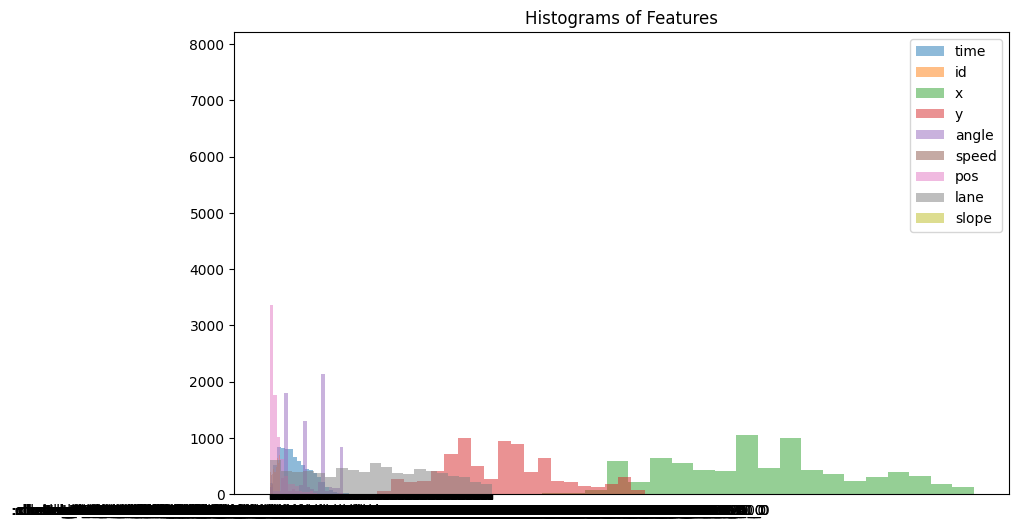

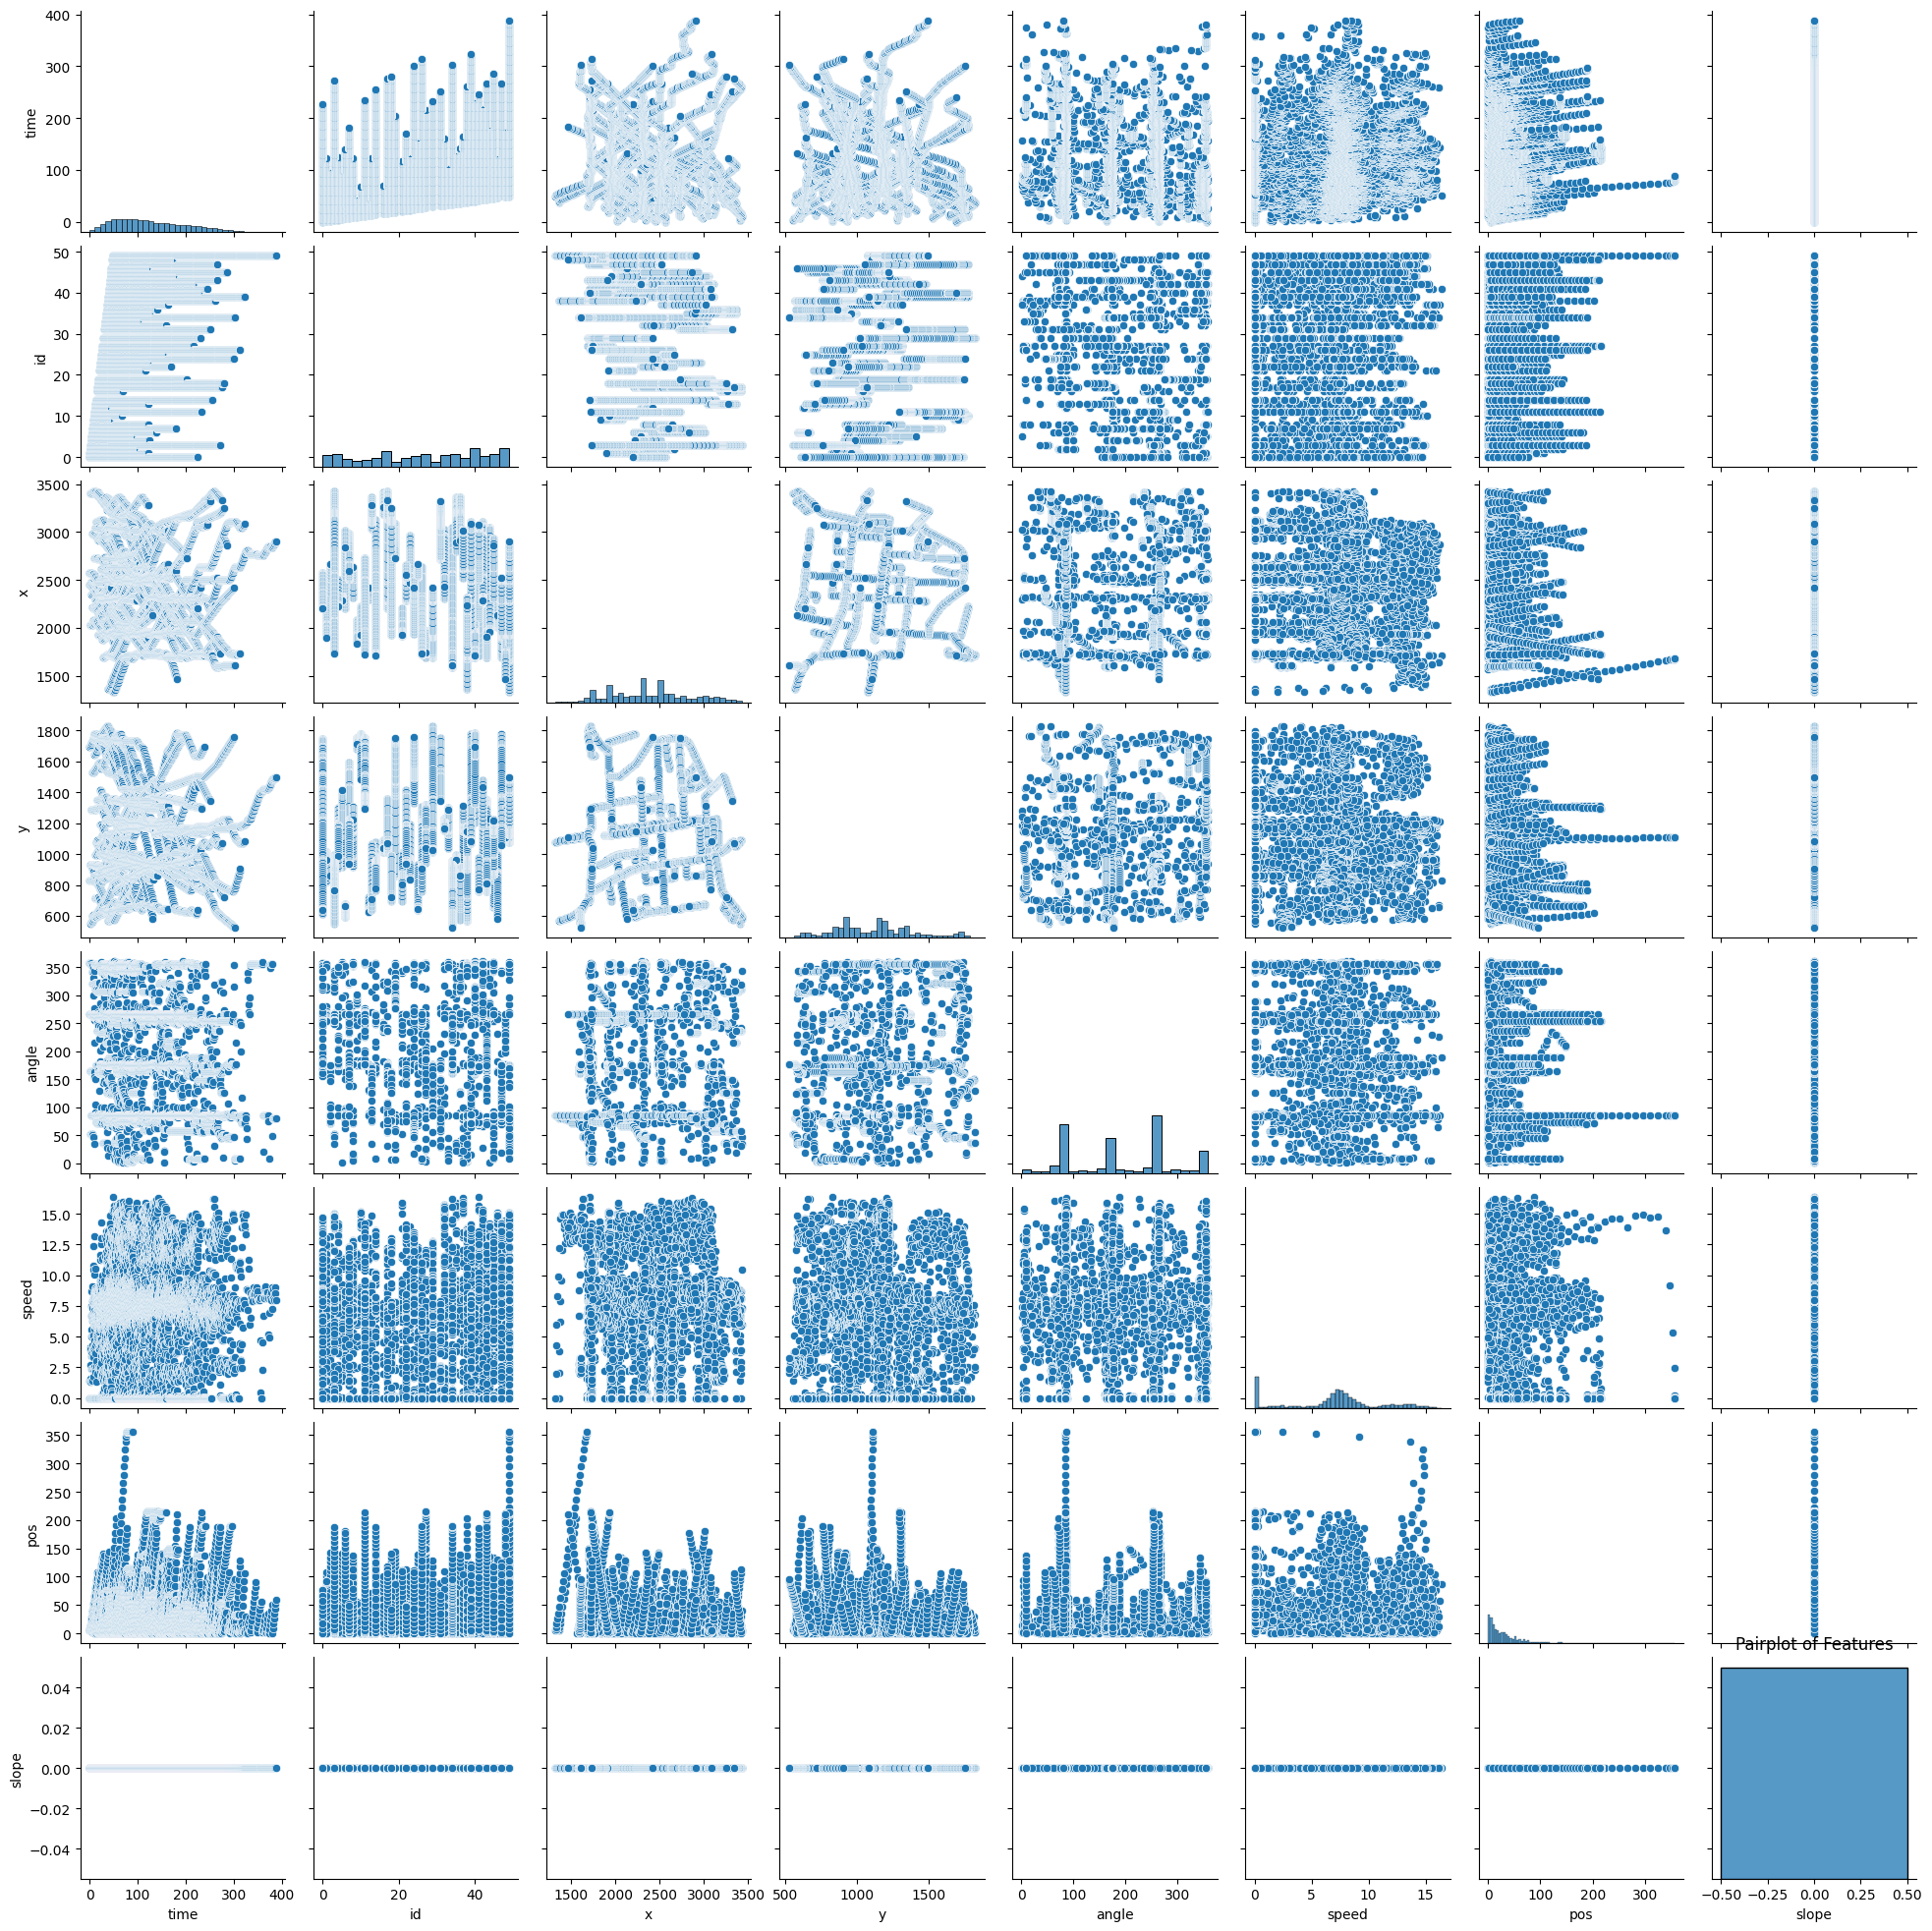

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.hist(df[column], bins=20, alpha=0.5, label=column)
plt.legend(loc='upper right')
plt.title('Histograms of Features')
plt.show()

sns.pairplot(df)
plt.title('Pairplot of Features')
plt.show()


In [ ]:

# With scaling
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['time','id','x', 'y', 'angle', 'speed', 'pos']])


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['x', 'y', 'angle','speed']])



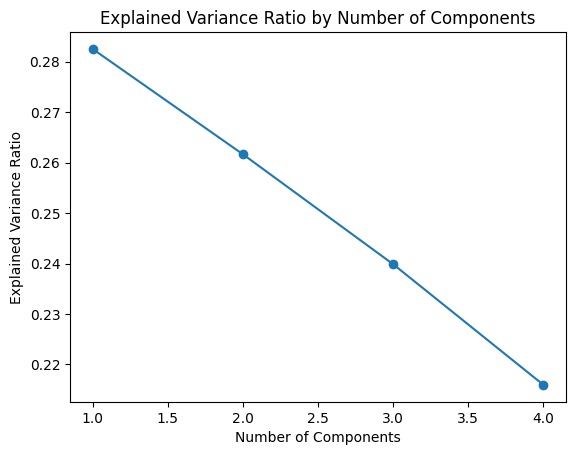

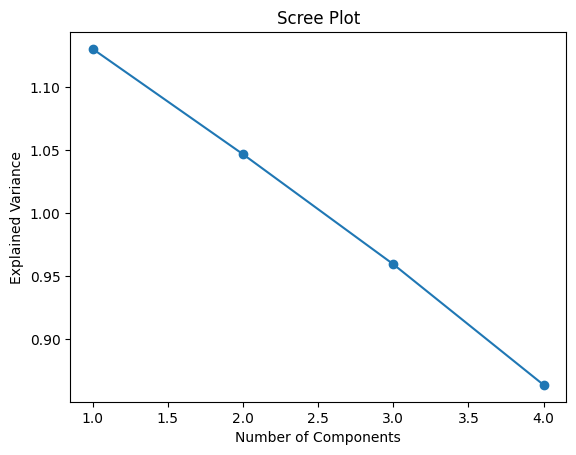

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)


plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()


plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

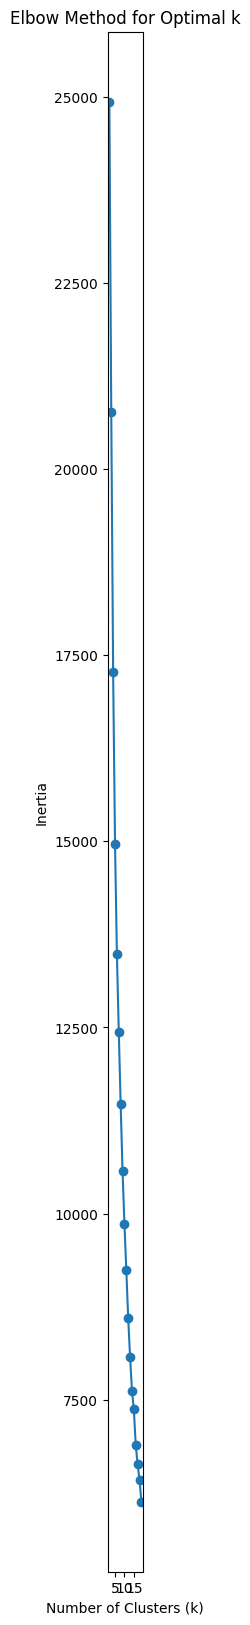

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


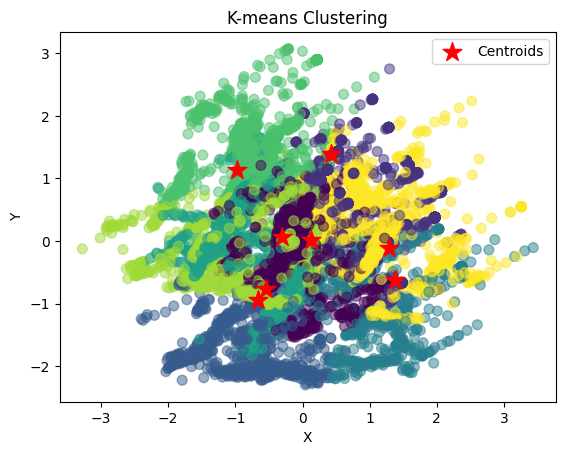

Silhouette Score: 0.2540545517729872
Davies-Bouldin Index: 1.2035378671803665


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler





silhouette_scores = []
davies_bouldin_scores = []

# Finding the optimal number of clusters (k) using the elbow method
inertia = []
for k in range(2, 20):  # Trying different values of k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    # Calculate Davies-Bouldin index
    davies_bouldin_idx = davies_bouldin_score(pca_data, kmeans.labels_)
    davies_bouldin_scores.append(davies_bouldin_idx)

    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(1, 20))
plt.subplot(1, 2, 1)
plt.plot(range(2, 20), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')


plt.tight_layout()
plt.show()

optimal_k = 8

# Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

df['cluster'] = kmeans.labels_

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['cluster'], cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', c='red', s=200, label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score and Davies-Bouldin index
silhouette_avg = silhouette_score(pca_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

davies_bouldin_idx = davies_bouldin_score(pca_data, kmeans.labels_)
print("Davies-Bouldin Index:", davies_bouldin_idx)


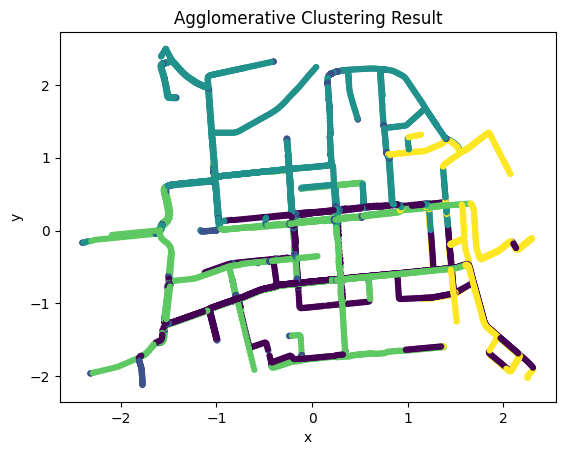

In [ ]:
#next algorithm

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

#  Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=5)

agg_clustering.fit(scaled_data)

# Visualize
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_clustering.labels_, cmap='viridis',marker='.',s=50)
plt.title('Agglomerative Clustering Result')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




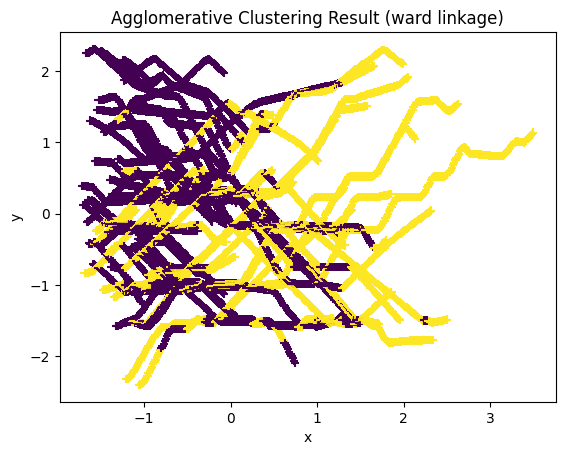

ward linkage - Silhouette Score: 0.12204646164330311, Davies-Bouldin Index: 2.619665442784643


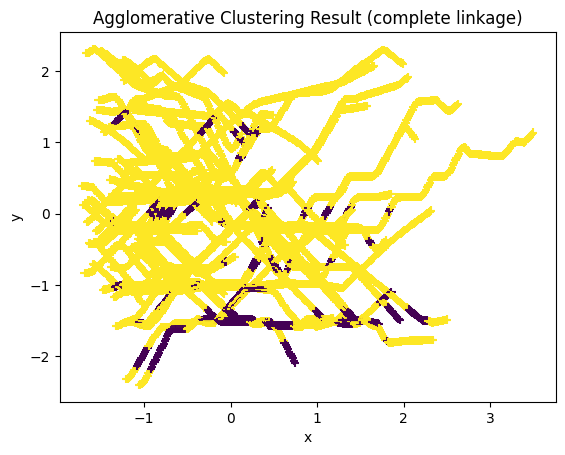

complete linkage - Silhouette Score: 0.2785396666304317, Davies-Bouldin Index: 1.5235172647168322


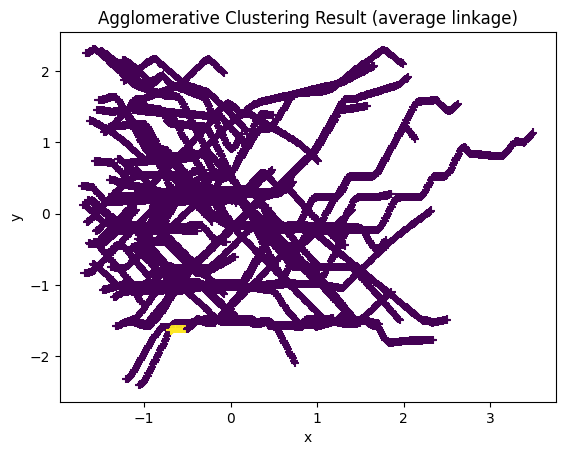

average linkage - Silhouette Score: 0.5901489160225848, Davies-Bouldin Index: 0.3543744256245878


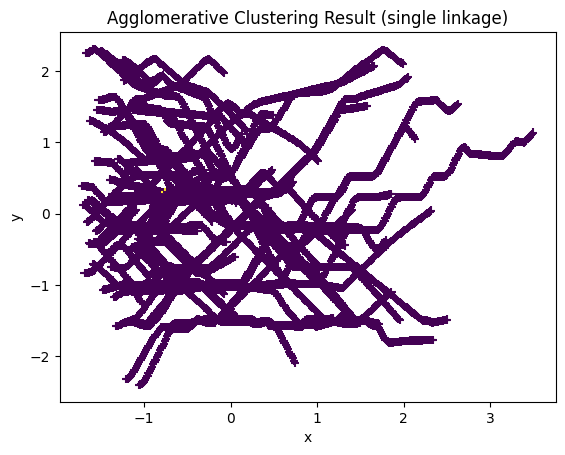

single linkage - Silhouette Score: 0.09993139727113641, Davies-Bouldin Index: 0.8272564651677108


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    agg_clustering = AgglomerativeClustering(linkage=method)
    agg_clustering.fit(scaled_data)
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_clustering.labels_, cmap='viridis',marker='+')
    plt.title(f'Agglomerative Clustering Result ({method} linkage)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Calculate the Silhouette Score
    silhouette = silhouette_score(scaled_data, agg_clustering.labels_)

    # Calculate the Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(scaled_data, agg_clustering.labels_)

    # Print the scores
    print(f'{method} linkage - Silhouette Score: {silhouette}, Davies-Bouldin Index: {davies_bouldin}')


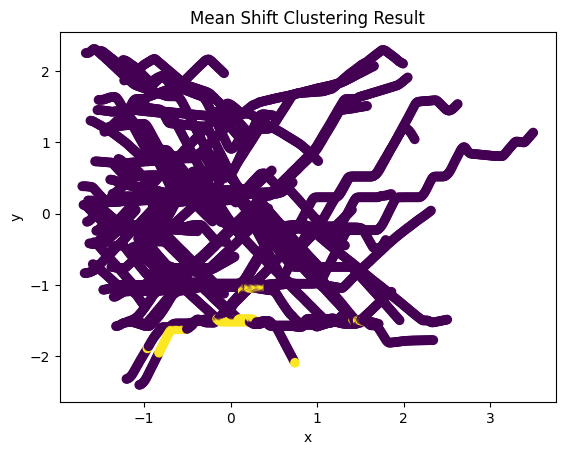

Silhouette Score: 0.42830512345046723, Davies-Bouldin Index: 0.8139117294651821


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
bandwidth = estimate_bandwidth(scaled_data, quantile=0.2, n_samples=2000)

mean_shift_clustering = MeanShift(bandwidth=bandwidth)
mean_shift_clustering.fit(scaled_data)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=mean_shift_clustering.labels_, cmap='viridis')
plt.title('Mean Shift Clustering Result')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

silhouette = silhouette_score(scaled_data, mean_shift_clustering.labels_)

davies_bouldin = davies_bouldin_score(scaled_data, mean_shift_clustering.labels_)

print(f'Silhouette Score: {silhouette}, Davies-Bouldin Index: {davies_bouldin}')


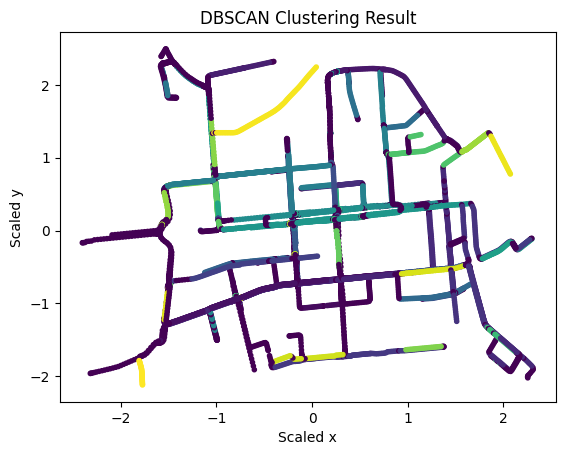

DBSCAN Silhouette Score: 0.09313928772746172


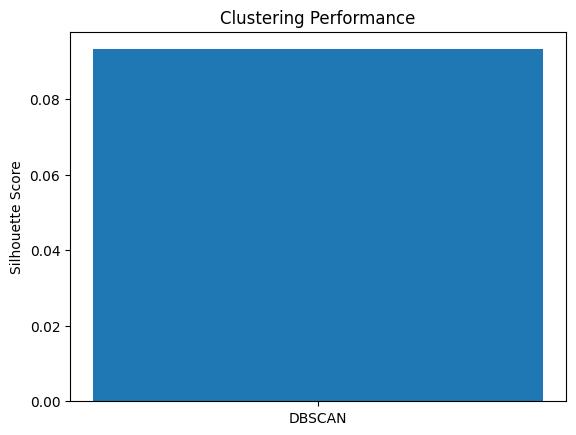

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.3, min_samples=20)

dbscan.fit(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan.labels_, cmap='viridis', marker='.')
plt.title('DBSCAN Clustering Result')
plt.xlabel('Scaled x')
plt.ylabel('Scaled y')
plt.show()


from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
labels = dbscan.labels_
silhouette_avg = silhouette_score(scaled_data, labels)

print(f'DBSCAN Silhouette Score: {silhouette_avg}')
plt.bar(['DBSCAN'], [silhouette_avg])
plt.title('Clustering Performance')
plt.ylabel('Silhouette Score')
plt.show()


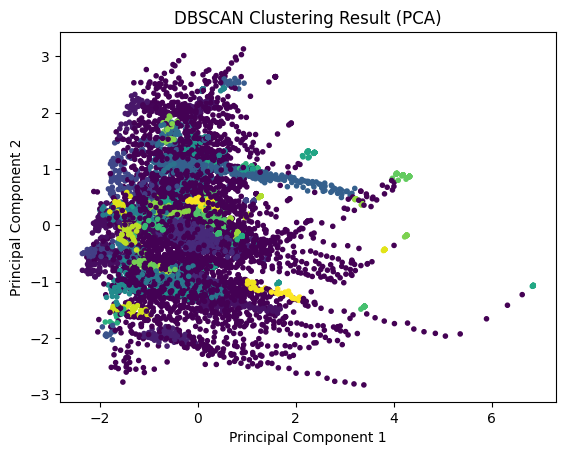

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['x', 'y', 'angle', 'speed', 'pos']])

# Apply PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

pca_data = pca.transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan.labels_, cmap='viridis', marker='.')
plt.title('DBSCAN Clustering Result (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()







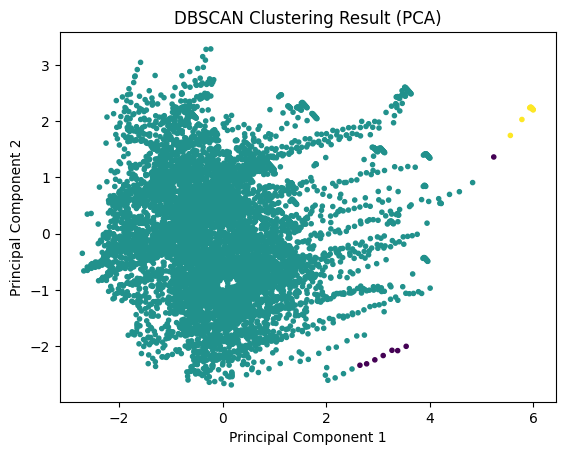

Silhouette Score: 0.4922001818437151
Davies-Bouldin Index: 0.4921046179404673


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10)

dbscan.fit(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan.labels_, cmap='viridis', marker='.')
plt.title('DBSCAN Clustering Result (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(pca_data, dbscan.labels_)
print("Silhouette Score:", silhouette)
davies_bouldin = davies_bouldin_score(pca_data, dbscan.labels_)
print("Davies-Bouldin Index:", davies_bouldin)



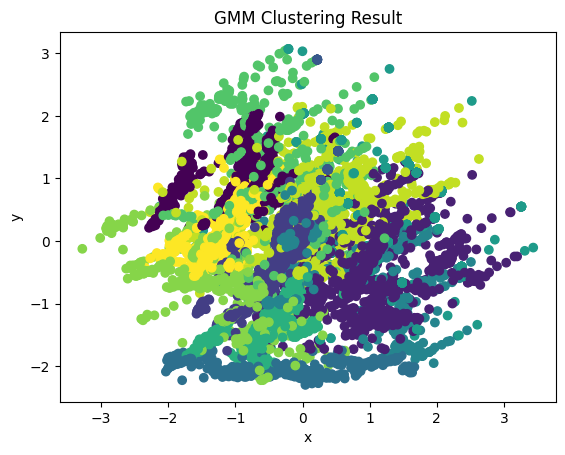

Silhouette Score: 0.18604981991553116
Davies-Bouldin Index: 1.423705067389566


In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_components = 12
gmm = GaussianMixture(n_components=n_components)
gmm.fit(pca_data)

cluster_labels = gmm.predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('GMM Clustering Result')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


from sklearn.metrics import silhouette_score
silhouette = silhouette_score(scaled_data, cluster_labels)
print("Silhouette Score:", silhouette)

from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(scaled_data, cluster_labels)
print("Davies-Bouldin Index:", db_index)


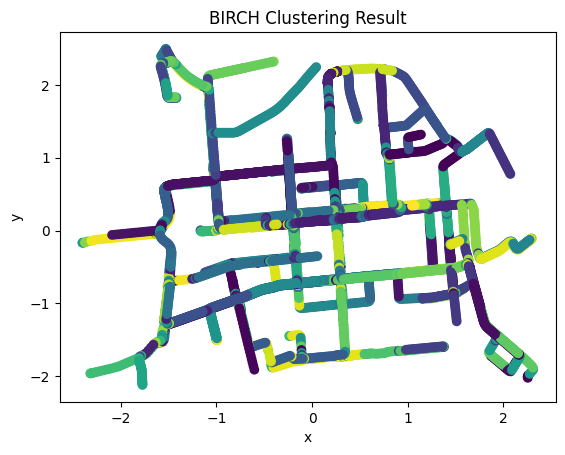

Silhouette Score: 0.40947047289963906
Davies-Bouldin Index: 0.8209158976122105


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt


# Applying BIRCH clustering
#play with the optimum number of clusters with here with respect to k-neighbour
n_clusters_birch = 150
birch = Birch(n_clusters=n_clusters_birch)
birch.fit(scaled_data)

cluster_labels_birch = birch.predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels_birch, cmap='viridis')
plt.title('BIRCH Clustering Result')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calculate Silhouette Score and Davies-Bouldin Index for BIRCH
silhouette_birch = silhouette_score(scaled_data, cluster_labels_birch)
print("Silhouette Score:", silhouette_birch)

db_index_birch = davies_bouldin_score(scaled_data, cluster_labels_birch)
print("Davies-Bouldin Index:", db_index_birch)


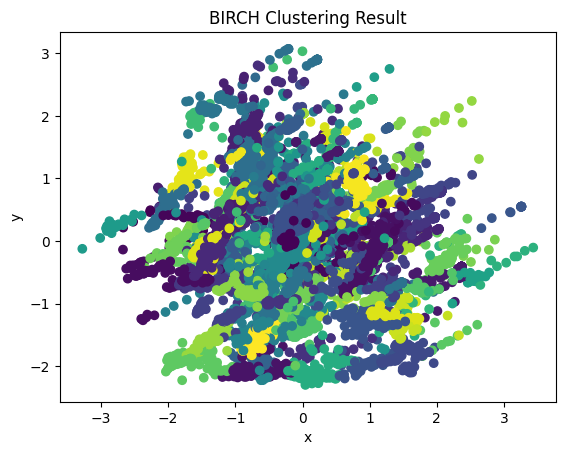

Silhouette Score: 0.40947047295960803
Davies-Bouldin Index: 0.820915898044912


In [ ]:

#play with the optimum number of clusters with here with respect to k-neighbour
n_clusters_birch = 150
birch = Birch(n_clusters=n_clusters_birch)
birch.fit(pca_data)

cluster_labels_birch = birch.predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels_birch, cmap='viridis')
plt.title('BIRCH Clustering Result')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calculate Silhouette Score and Davies-Bouldin Index for BIRCH
silhouette_birch = silhouette_score(pca_data, cluster_labels_birch)
print("Silhouette Score:", silhouette_birch)

db_index_birch = davies_bouldin_score(pca_data, cluster_labels_birch)
print("Davies-Bouldin Index:", db_index_birch)
